In [4]:
from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [5]:
#학습용 404개, 검증용 102개, 13개의 변수
print(X_train.shape)
print(X_train.shape[1])

(404, 13)
13


In [6]:
X_test.shape

(102, 13)

In [7]:
y_train[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

<AxesSubplot:>

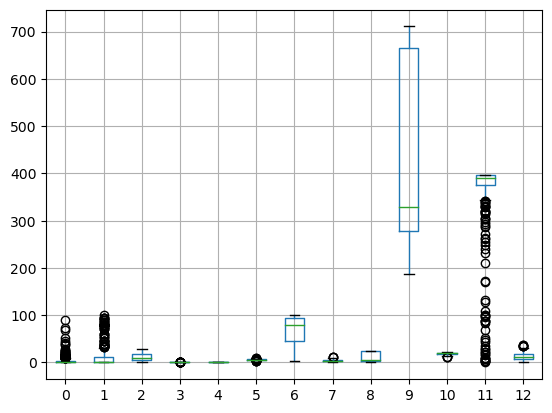

In [8]:
import pandas as pd
pd.DataFrame(X_train).boxplot()

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #평균 0, 표준편차 1로 만드는 스케일러
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
pd.DataFrame(X_train_scaled).boxplot()

<AxesSubplot:>

In [25]:
from keras import models, layers
#64개의 노드를 가진 은닉층 2개의 신경망
def build_model():
    model = models.Sequential()
    #relu
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model
model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                896       
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


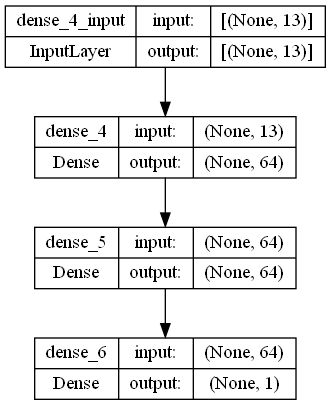

In [23]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [16]:
# 모델 학습 (미니배치 default=32개)
hist=model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
7/7 [==============================] - 1s 5ms/step - loss: 577.1315 - mae: 22.1986
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 569.6044 - mae: 22.0347
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 561.5733 - mae: 21.8604
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 552.4574 - mae: 21.6623
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 542.2925 - mae: 21.4403
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 531.3602 - mae: 21.2010
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 518.9806 - mae: 20.9301
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 505.8417 - mae: 20.6332
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 492.0070 - mae: 20.3215
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 477.0785 - mae: 19.9767
Epoch 11/100
7/7 [==============================

In [18]:
# 검증용 데이터로 모델 평가
mse, mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print(mse)
print(mae) # 2615 달러 정도 차이가 남

4/4 [==============================] - 0s 4ms/step - loss: 609.7219 - mae: 22.9502
609.721923828125
22.95024871826172


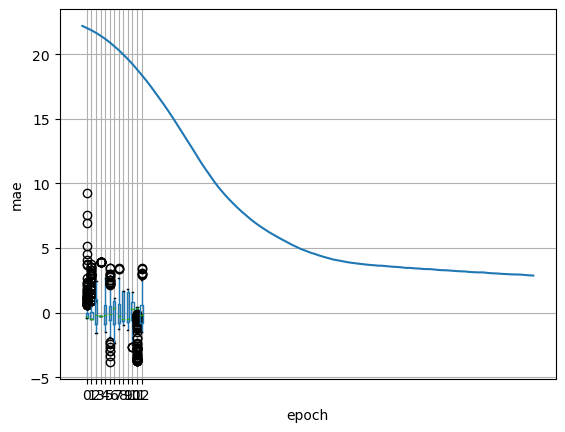

In [19]:
import matplotlib.pyplot as plt
plt.plot(hist.history["mae"])
plt.ylabel("mae")
plt.xlabel("epoch")
plt.show()

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                896       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
Total params: 5,056
Trainable params: 5,056
Non-trainable params: 0
_________________________________________________________________


In [26]:
# https://github.com/gaussian37/netron
from keras.models import load_model

model.save('mymodel.h5')
del model
model = load_model('mymodel.h5')